# **Load Dataset**

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/KlikBERT/Final Dataset/labeled_data_unbalanced.csv")
df

,judul,isi,clickbait_label,kategori_berita
0,Bongkahan Semen dari Atap Masjid Agung Abdya J...,Bongkahan semen dari atap Masjid Agung Baitul ...,non clickbait,lingkungan
1,Cerita Afgan Berangkat Haji Sendiri: Modal Nek...,Penyanyi Afgan merekam video saat dirinya berj...,teasing,lifestyle
2,"Cuaca Buruk, Dua Keberangkatan Kapal Cepat dar...",Dua trip kapal cepat dari Pelabuhan Penyeberan...,non clickbait,lingkungan
3,Diprotes Maxime Bottier Gegara Tak Pakai Cinci...,Pasangan artis Luna Maya dan Maxime Bouttier b...,teasing,entertainment
4,"Gajah Kembali Obrak-abrik Kebun, Kali Ini 3 He...",Kawanan gajah Sumatera kembali merusak kebun m...,non clickbait,lingkungan
...,...,...,...,...
45570,"Tipe-tipe Traveler Berdasarkan Golongan Darah,...",Setiap orang memiliki karakternya masing-masin...,teasing,lifestyle
45571,Alumni YLBHI-LBH Tolak RUU Revisi UU KPK,Perwakilan Rakyat (DPR) dalam sidang paripurna...,non clickbait,politik
45572,Catatan KH Imam Jazuli Tentang Kontroversi Cer...,"Sangat disayangkan, wacana agama tampil seram....",non clickbait,politik
45573,KPK Memang 'Seksi',", (KPK) memang seksi, sehingga eksekutif dan l...",teasing,politik


# **Cek NaN**

In [3]:
# cek nan
df.isna().sum()

,0
judul,0
isi,0
clickbait_label,0
kategori_berita,0


# **Cek distribusi kelas dalam kolom label dan kategori dengan sns plot**

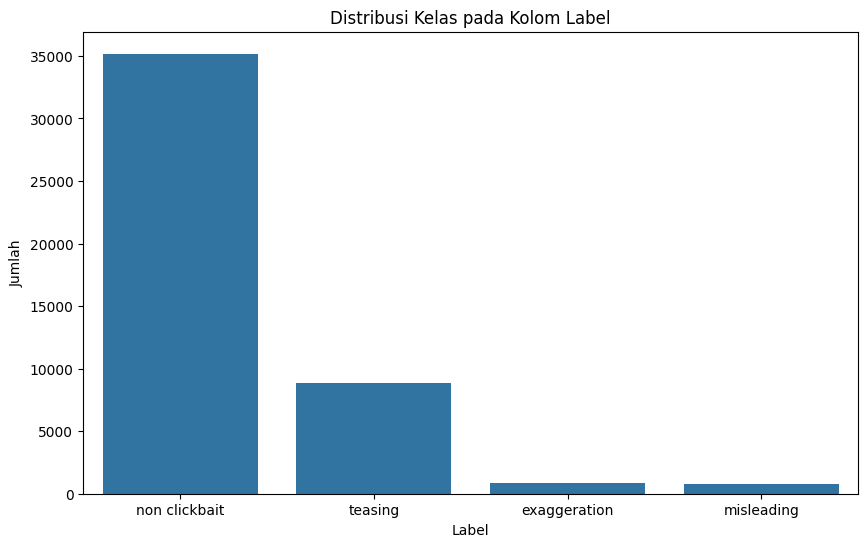

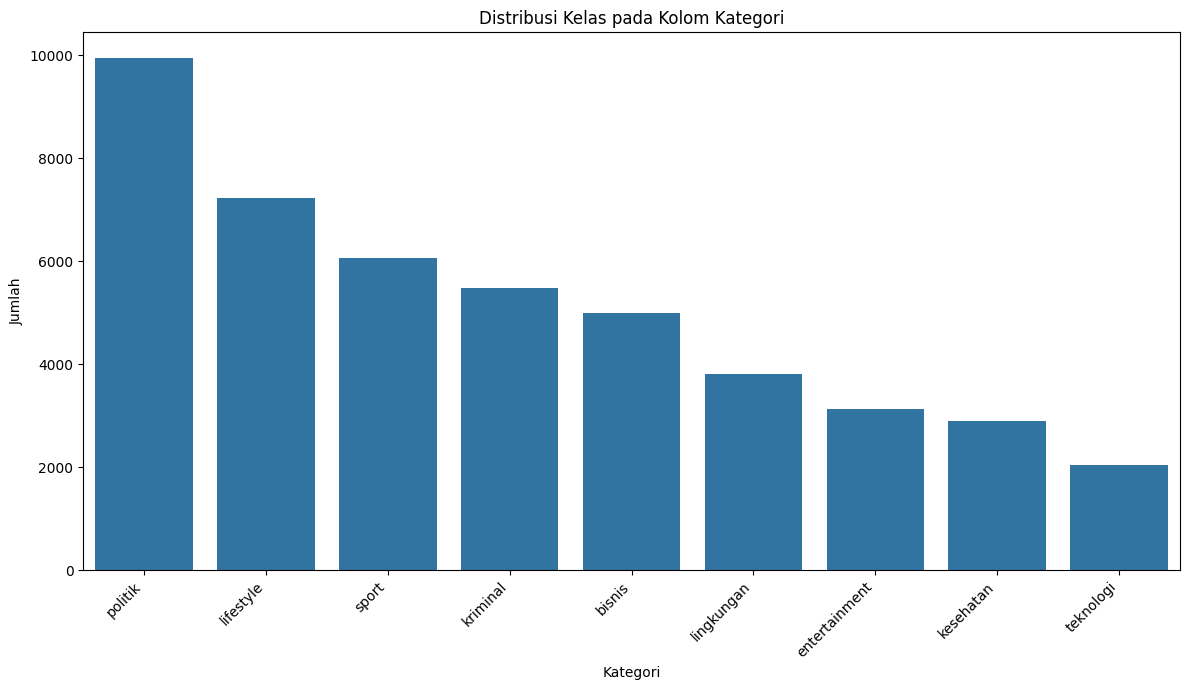

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='clickbait_label', data=df, order=df['clickbait_label'].value_counts().index)
plt.title('Distribusi Kelas pada Kolom Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(x='kategori_berita', data=df, order=df['kategori_berita'].value_counts().index)
plt.title('Distribusi Kelas pada Kolom Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Lakukan Augmentasi data: Penambahan Data pada kelas minoritas**

## Penambahan kelas exaggeration

In [5]:
# drop kelas exaggeration pada dataset awal
df = df[df['clickbait_label'] != 'exaggeration']
df

,judul,isi,clickbait_label,kategori_berita
0,Bongkahan Semen dari Atap Masjid Agung Abdya J...,Bongkahan semen dari atap Masjid Agung Baitul ...,non clickbait,lingkungan
1,Cerita Afgan Berangkat Haji Sendiri: Modal Nek...,Penyanyi Afgan merekam video saat dirinya berj...,teasing,lifestyle
2,"Cuaca Buruk, Dua Keberangkatan Kapal Cepat dar...",Dua trip kapal cepat dari Pelabuhan Penyeberan...,non clickbait,lingkungan
3,Diprotes Maxime Bottier Gegara Tak Pakai Cinci...,Pasangan artis Luna Maya dan Maxime Bouttier b...,teasing,entertainment
4,"Gajah Kembali Obrak-abrik Kebun, Kali Ini 3 He...",Kawanan gajah Sumatera kembali merusak kebun m...,non clickbait,lingkungan
...,...,...,...,...
45569,"Tiket Pesawat Murah ke Osaka dari Jakarta PP, ...",Traveler yang mencari tiket pesawat murah ke O...,non clickbait,bisnis
45570,"Tipe-tipe Traveler Berdasarkan Golongan Darah,...",Setiap orang memiliki karakternya masing-masin...,teasing,lifestyle
45571,Alumni YLBHI-LBH Tolak RUU Revisi UU KPK,Perwakilan Rakyat (DPR) dalam sidang paripurna...,non clickbait,politik
45572,Catatan KH Imam Jazuli Tentang Kontroversi Cer...,"Sangat disayangkan, wacana agama tampil seram....",non clickbait,politik


In [6]:
df_exaggeration = pd.read_csv("/content/drive/MyDrive/KlikBERT/Final Dataset/exaggeration_augmented_clean.csv")
df_exaggeration

,judul,isi,clickbait_label,kategori_berita
0,"Lamborghini, Banteng Penabrak Semua Batasan",LAMBORGHINI menghadirkan banteng paling perkas...,exaggeration,teknologi
1,"Waspada, Riset Buktikan Vape Bisa Picu Penyaki...",", - Selama berminggu-minggu, para peneliti di ...",exaggeration,kesehatan
2,"Menyedihkan, Ponsel Apple iPhone 11 Dihujani K...",", - Setelah pasar menunggu lama, Apple akhirny...",exaggeration,teknologi
3,Satu Miliar Lebih Pengguna Ponsel Dimata-matai...,", - Para peneliti di sebuah perusahaan keamana...",exaggeration,teknologi
4,"BENCANA PHK Depan Mata, Mendagri Izinkan Pemda...",Menteri Dalam Negeri (Mendagri) Tito Karnavian...,exaggeration,bisnis
...,...,...,...,...
8545,Alexander Marwata: Cuma Orang Tolol yang Kena ...,Dalam uji kelayakan dan kepatutan calon pimpin...,exaggeration,politik
8546,"Kabut Asap Ancam Kesehatan, 400 Sekolah di Mal...",Sebanyak 400 sekolah di Malaysia terpaksa dili...,exaggeration,kesehatan
8547,"Mahasiswa Banten Protes RUU Bermasalah: ""Penuh...",Ribuan mahasiswa dari berbagai universitas di ...,exaggeration,politik
8548,Pilkades di Jember Dimanfaatkan Bandar Judi Ra...,Sebanyak 10 terduga bandar judi terkait Pemili...,exaggeration,kriminal


## Penambahan kelas misleading

In [7]:
# drop kelas misleading pada dataset awal
df = df[df['clickbait_label'] != 'misleading']
df

,judul,isi,clickbait_label,kategori_berita
0,Bongkahan Semen dari Atap Masjid Agung Abdya J...,Bongkahan semen dari atap Masjid Agung Baitul ...,non clickbait,lingkungan
1,Cerita Afgan Berangkat Haji Sendiri: Modal Nek...,Penyanyi Afgan merekam video saat dirinya berj...,teasing,lifestyle
2,"Cuaca Buruk, Dua Keberangkatan Kapal Cepat dar...",Dua trip kapal cepat dari Pelabuhan Penyeberan...,non clickbait,lingkungan
3,Diprotes Maxime Bottier Gegara Tak Pakai Cinci...,Pasangan artis Luna Maya dan Maxime Bouttier b...,teasing,entertainment
4,"Gajah Kembali Obrak-abrik Kebun, Kali Ini 3 He...",Kawanan gajah Sumatera kembali merusak kebun m...,non clickbait,lingkungan
...,...,...,...,...
45569,"Tiket Pesawat Murah ke Osaka dari Jakarta PP, ...",Traveler yang mencari tiket pesawat murah ke O...,non clickbait,bisnis
45570,"Tipe-tipe Traveler Berdasarkan Golongan Darah,...",Setiap orang memiliki karakternya masing-masin...,teasing,lifestyle
45571,Alumni YLBHI-LBH Tolak RUU Revisi UU KPK,Perwakilan Rakyat (DPR) dalam sidang paripurna...,non clickbait,politik
45572,Catatan KH Imam Jazuli Tentang Kontroversi Cer...,"Sangat disayangkan, wacana agama tampil seram....",non clickbait,politik


In [8]:
df_misleading = pd.read_csv("/content/drive/MyDrive/KlikBERT/Final Dataset/misleading_augmented_clean.csv")
df_misleading

,judul,isi,clickbait_label,kategori_berita
0,"Racikan Jus Nanas, Lobak, dan Kemiri Diklaim O...",Hoaks lama beredar kembali. Ahli gizi dr. Maru...,misleading,kesehatan
1,"Transfer Liga Inggris: Chelsea 5 Pemain, MU 4,...",Jendela Transfer Musim Panas 2025 dibuka mulai...,misleading,sport
2,Foto Jet Tempur Israel Jatuh hingga Rudal Indo...,"Selama sepekan terakhir, berbagai berita hoaks...",misleading,teknologi
3,Agnes Monica Promosikan Obat Mata dalam Video ...,Sebuah video yang menunjukkan Agnes Monica men...,misleading,teknologi
4,Video Pesawat Jemaah Haji Jatuh hingga Penyelu...,"Sejumlah video hoaks beredar, termasuk klaim j...",misleading,teknologi
...,...,...,...,...
8714,Kaitan Efek Samping Vaksin AstraZeneca dengan ...,"Klaim bahwa efek samping vaksin AstraZeneca, s...",misleading,kesehatan
8715,Guru Honorer Cabuli 23 Siswi dengan Iming-imin...,Seorang guru honorer berinisial FR di SMPN Teb...,misleading,kriminal
8716,Fenomena Aphelion Tidak Menyebabkan Suhu Bumi ...,Klaim bahwa fenomena Aphelion membuat suhu bum...,misleading,lingkungan
8717,Tesla Smartphone Buatan Elon Musk adalah Hoaks,Kabar mengenai peluncuran Tesla Smartphone ole...,misleading,teknologi


## Penggabungan Data

In [9]:
# gabung dataset
df = pd.concat([df, df_exaggeration, df_misleading])
df

,judul,isi,clickbait_label,kategori_berita
0,Bongkahan Semen dari Atap Masjid Agung Abdya J...,Bongkahan semen dari atap Masjid Agung Baitul ...,non clickbait,lingkungan
1,Cerita Afgan Berangkat Haji Sendiri: Modal Nek...,Penyanyi Afgan merekam video saat dirinya berj...,teasing,lifestyle
2,"Cuaca Buruk, Dua Keberangkatan Kapal Cepat dar...",Dua trip kapal cepat dari Pelabuhan Penyeberan...,non clickbait,lingkungan
3,Diprotes Maxime Bottier Gegara Tak Pakai Cinci...,Pasangan artis Luna Maya dan Maxime Bouttier b...,teasing,entertainment
4,"Gajah Kembali Obrak-abrik Kebun, Kali Ini 3 He...",Kawanan gajah Sumatera kembali merusak kebun m...,non clickbait,lingkungan
...,...,...,...,...
8714,Kaitan Efek Samping Vaksin AstraZeneca dengan ...,"Klaim bahwa efek samping vaksin AstraZeneca, s...",misleading,kesehatan
8715,Guru Honorer Cabuli 23 Siswi dengan Iming-imin...,Seorang guru honorer berinisial FR di SMPN Teb...,misleading,kriminal
8716,Fenomena Aphelion Tidak Menyebabkan Suhu Bumi ...,Klaim bahwa fenomena Aphelion membuat suhu bum...,misleading,lingkungan
8717,Tesla Smartphone Buatan Elon Musk adalah Hoaks,Kabar mengenai peluncuran Tesla Smartphone ole...,misleading,teknologi


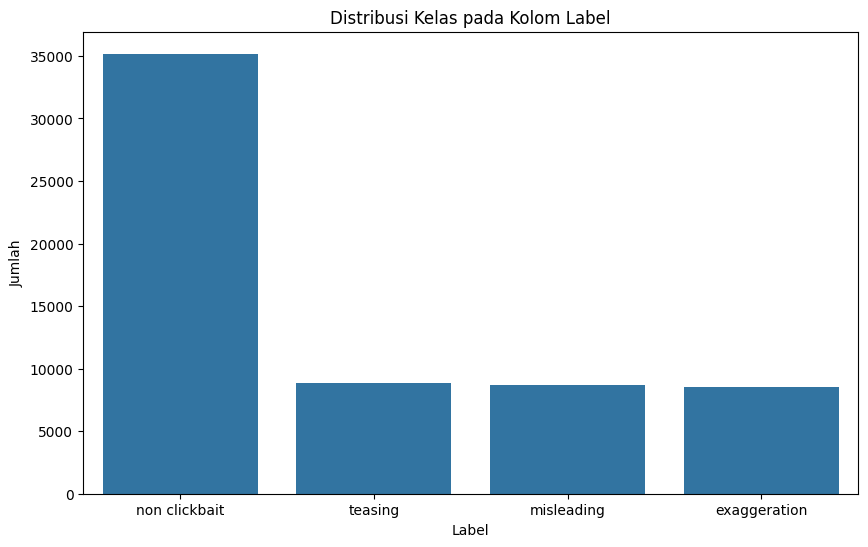

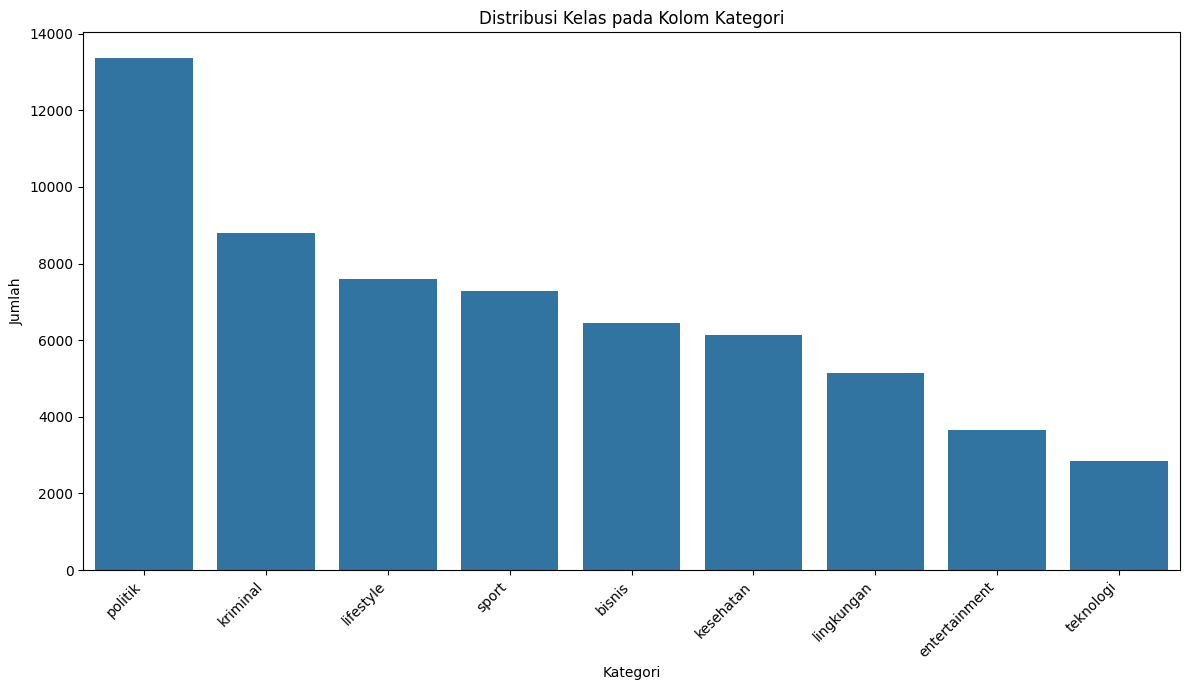

In [10]:
# cek kembali distribusi kelas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='clickbait_label', data=df, order=df['clickbait_label'].value_counts().index)
plt.title('Distribusi Kelas pada Kolom Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(x='kategori_berita', data=df, order=df['kategori_berita'].value_counts().index)
plt.title('Distribusi Kelas pada Kolom Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Lakukan Undersampling setelah augmentasi**

skor balance = 1 - (max_count - min_count) / total_count
dengan skor total fitness = 0.7 * clickbait_label + 0.3 * kategori_berita

📌 Nama Metode
Joint-stratified undersampling with marginal balance optimization (buatan mba icha)

✅ Inti idenya
Kita mau sampling data sehingga distribusi gabungan (clickbait_label × kategori_berita) terkontrol, tapi fitness dihitung atas marginals sesuai bobot yang diinginkan.

✅ Fitness Function
fitness
=
0.7
×
balance
clickbait
+
0.3
×
balance
kategori
fitness=0.7×balance
clickbait
​
 +0.3×balance
kategori
​

Dengan:

balance
=
1
−
max
⁡
(
count
)
−
min
⁡
(
count
)
total
balance=1−
total
max(count)−min(count)
​

✅ Langkah Algoritma Ringkas

1️⃣ Tambahkan kolom joint_label

Bentuk: clickbait_label || kategori_berita

Ini mewakili semua kombinasi unik kelas → joint space.

2️⃣ Hitung jumlah tersedia per joint_label

Distribusi aslinya jadi batas atas untuk sampling tanpa duplikat.

3️⃣ Iterasi trials (random search):

Untuk setiap trial:

- Buat random plan → pilih target count untuk setiap joint_label (antara min_class_count dan max tersedia).

- Hitung total count → hanya simpan plan jika ≥ minimal_output_size.

- Hitung marginals (clickbait dan kategori) dari plan.

- Hitung balance_clickbait dan balance_kategori.

- Hitung fitness = 0.7 × balance_clickbait + 0.3 × balance_kategori.

- Simpan plan dengan fitness terbaik.

4️⃣ Sampling data sesuai plan terbaik

Untuk setiap joint_label, ambil sesuai target dari data (tanpa replacement → no duplicate).

5️⃣ Pastikan ukuran akhir ≥ minimal_output_size

Jika kurang → tambahkan baris acak lain (optional untuk jaga ukuran minimum).

6️⃣ Hitung fitness akhir

Setelah sampling → evaluasi kembali marginals dan balance → laporkan fitness sebenarnya.

✅ Ciri-ciri metode ini

✔️ Mengontrol sampling di level joint-label → mencegah overlap tidak terkontrol.

✔️ Mengoptimasi balance di marginal (clickbait dan kategori) → sesuai bobot yang ditetapkan.

✔️ Sampling tanpa duplikat (replace=False).

✔️ Fleksibel, bisa dipakai untuk dataset dengan kombinasi label lain.

✔️ Berbasis random search → bisa menemukan berbagai solusi bagus jika trials cukup banyak.

In [36]:
import pandas as pd
import numpy as np
import random

random.seed(42)
np.random.seed(42)

def undersample_joint_balanced_weighted(
    df,
    clickbait_col='clickbait_label',
    kategori_col='kategori_berita',
    minimal_output_size=10000,
    trials=1000,
    min_class_count=5,
    verbose=False
):
    df = df.copy()
    df['joint_label'] = df[clickbait_col].astype(str) + '||' + df[kategori_col].astype(str)

    joint_counts = df['joint_label'].value_counts().to_dict()
    unique_joint_labels = list(joint_counts.keys())

    # Map joint_label to clickbait and kategori components
    joint_to_clickbait = {jl: jl.split('||')[0] for jl in unique_joint_labels}
    joint_to_kategori = {jl: jl.split('||')[1] for jl in unique_joint_labels}

    if verbose:
        print(f"Number of unique joint classes: {len(unique_joint_labels)}")

    best_fitness = -1
    best_plan = None

    for trial in range(trials):
        plan = {}
        for joint in unique_joint_labels:
            max_available = joint_counts[joint]
            if max_available < min_class_count:
                plan[joint] = max_available
            else:
                plan[joint] = random.randint(min_class_count, max_available)

        total_count = sum(plan.values())
        if total_count < minimal_output_size:
            continue

        # Marginal distributions
        clickbait_marginal = {}
        kategori_marginal = {}
        for joint, count in plan.items():
            cb = joint_to_clickbait[joint]
            kat = joint_to_kategori[joint]
            clickbait_marginal[cb] = clickbait_marginal.get(cb, 0) + count
            kategori_marginal[kat] = kategori_marginal.get(kat, 0) + count

        # Balance metrics
        def compute_balance(counts):
            if not counts:
                return 0
            vals = list(counts.values())
            return 1 - (max(vals) - min(vals)) / sum(vals)

        balance_clickbait = compute_balance(clickbait_marginal)
        balance_kategori = compute_balance(kategori_marginal)
        fitness = 0.7 * balance_clickbait + 0.3 * balance_kategori

        if verbose and trial % 100 == 0:
            print(f"Trial {trial}: fitness={fitness:.4f}, total_count={total_count}")

        if fitness > best_fitness:
            best_fitness = fitness
            best_plan = plan

    if best_plan is None:
        raise ValueError("No valid sampling plan found with given constraints.")

    if verbose:
        print("\n✅ Best sampling plan found!")
        print(f"Best fitness (planned): {best_fitness:.4f}")
        print("Sample plan per joint_label:")
        for k, v in best_plan.items():
            print(f"{k}: {v}")

    # Perform the sampling
    sampled_dfs = []
    for joint, target in best_plan.items():
        subset = df[df['joint_label'] == joint]
        if target >= len(subset):
            sampled = subset
        else:
            sampled = subset.sample(n=target, replace=False, random_state=42)
        sampled_dfs.append(sampled)

    result = pd.concat(sampled_dfs, ignore_index=True)

    # Enforce minimal_output_size if short
    if len(result) < minimal_output_size:
        shortfall = minimal_output_size - len(result)
        additional = df.drop(result.index).sample(n=shortfall, replace=False, random_state=42)
        result = pd.concat([result, additional], ignore_index=True)
        if verbose:
            print(f"Added {shortfall} more rows to meet minimal size.")

    # Evaluate final result fitness
    if verbose:
        # Rebuild joint_label in case the extra rows added lacked it
        result['joint_label'] = result[clickbait_col].astype(str) + '||' + result[kategori_col].astype(str)

        # Marginal counts
        final_clickbait_counts = result[clickbait_col].value_counts().to_dict()
        final_kategori_counts = result[kategori_col].value_counts().to_dict()

        balance_clickbait_final = compute_balance(final_clickbait_counts)
        balance_kategori_final = compute_balance(final_kategori_counts)
        final_fitness = 0.7 * balance_clickbait_final + 0.3 * balance_kategori_final

        print("\n✅ Final Result")
        print(f"Size: {len(result)}")
        print(f"Final Clickbait balance: {balance_clickbait_final:.4f}")
        print(f"Final Kategori balance: {balance_kategori_final:.4f}")
        print(f"Final Fitness: {final_fitness:.4f}")

        print("\nClickbait_label distribution:")
        print(result[clickbait_col].value_counts())

        print("\nKategori_berita distribution:")
        print(result[kategori_col].value_counts())

    result = result.drop(columns=['joint_label'])
    return result

result_df = undersample_joint_balanced_weighted(
    df,
    clickbait_col='clickbait_label',
    kategori_col='kategori_berita',
    minimal_output_size=10000,
    trials=1000000,
    verbose=True
)


Streaming output truncated to the last 5000 lines.
Trial 506700: fitness=0.5407, total_count=40745
Trial 506800: fitness=0.6645, total_count=20616
Trial 506900: fitness=0.6528, total_count=36085
Trial 507000: fitness=0.6295, total_count=29383
Trial 507100: fitness=0.5227, total_count=31185
Trial 507200: fitness=0.6240, total_count=35524
Trial 507300: fitness=0.6268, total_count=30031
Trial 507400: fitness=0.6605, total_count=30862
Trial 507500: fitness=0.5987, total_count=33757
Trial 507600: fitness=0.6415, total_count=32647
Trial 507700: fitness=0.4964, total_count=30779
Trial 507800: fitness=0.6172, total_count=24294
Trial 507900: fitness=0.6083, total_count=26963
Trial 508000: fitness=0.6946, total_count=26234
Trial 508100: fitness=0.5796, total_count=24325
Trial 508200: fitness=0.6342, total_count=35868
Trial 508300: fitness=0.8076, total_count=24178
Trial 508400: fitness=0.6482, total_count=28974
Trial 508500: fitness=0.8032, total_count=21067
Trial 508600: fitness=0.6442, total_c

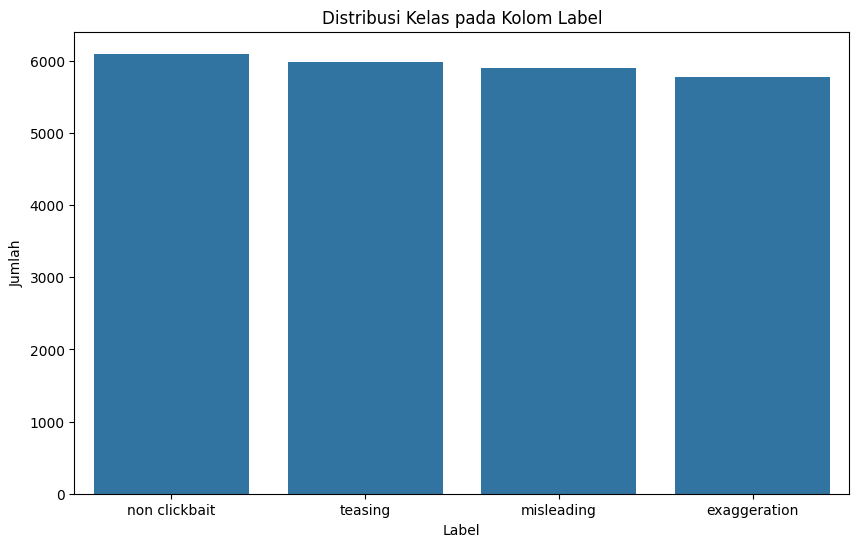

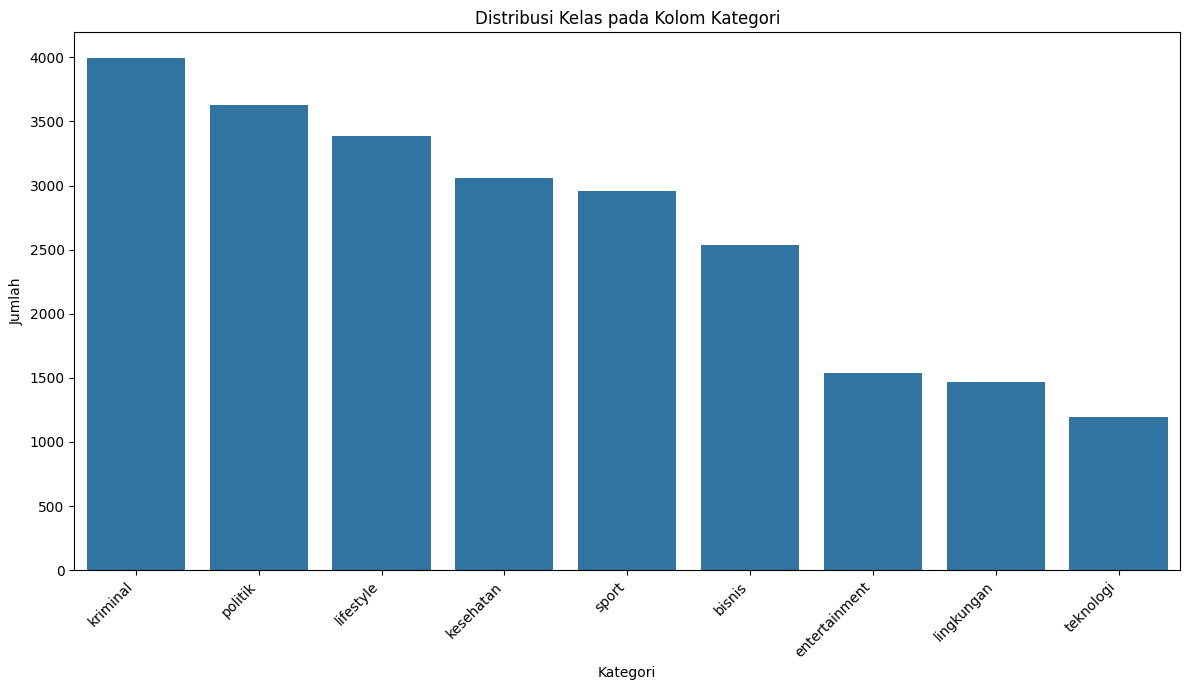

In [38]:
# cek kembali distribusi kelas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='clickbait_label', data=result_df, order=result_df['clickbait_label'].value_counts().index)
plt.title('Distribusi Kelas pada Kolom Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(x='kategori_berita', data=result_df, order=result_df['kategori_berita'].value_counts().index)
plt.title('Distribusi Kelas pada Kolom Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
# cek duplikat
result_df.duplicated().sum()

np.int64(0)

In [41]:
# ekspor dataset
result_df.to_csv("/content/drive/MyDrive/KlikBERT/Final Dataset/labeled_data_balanced_2.csv", index=False)